# 자전거 타는 사람

In [49]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### (1) 데이터 가져오기

In [128]:

train = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [129]:
def create_datetime_cols(df_col):
    df = pd.DataFrame()
    df['year'] = pd.to_datetime(df_col).dt.year
    df['month'] = pd.to_datetime(df_col).dt.month
    df['day'] = pd.to_datetime(df_col).dt.day
    df['hour'] = pd.to_datetime(df_col).dt.hour
    df['minute'] = pd.to_datetime(df_col).dt.minute
    df['second'] = pd.to_datetime(df_col).dt.second
    return df

In [130]:
train_datetime = create_datetime_cols(train['datetime'])
train_datetime

,year,month,day,hour,minute,second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0
...,...,...,...,...,...,...
10881,2012,12,19,19,0,0
10882,2012,12,19,20,0,0
10883,2012,12,19,21,0,0
10884,2012,12,19,22,0,0


In [131]:
train = pd.concat([train, train_datetime], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

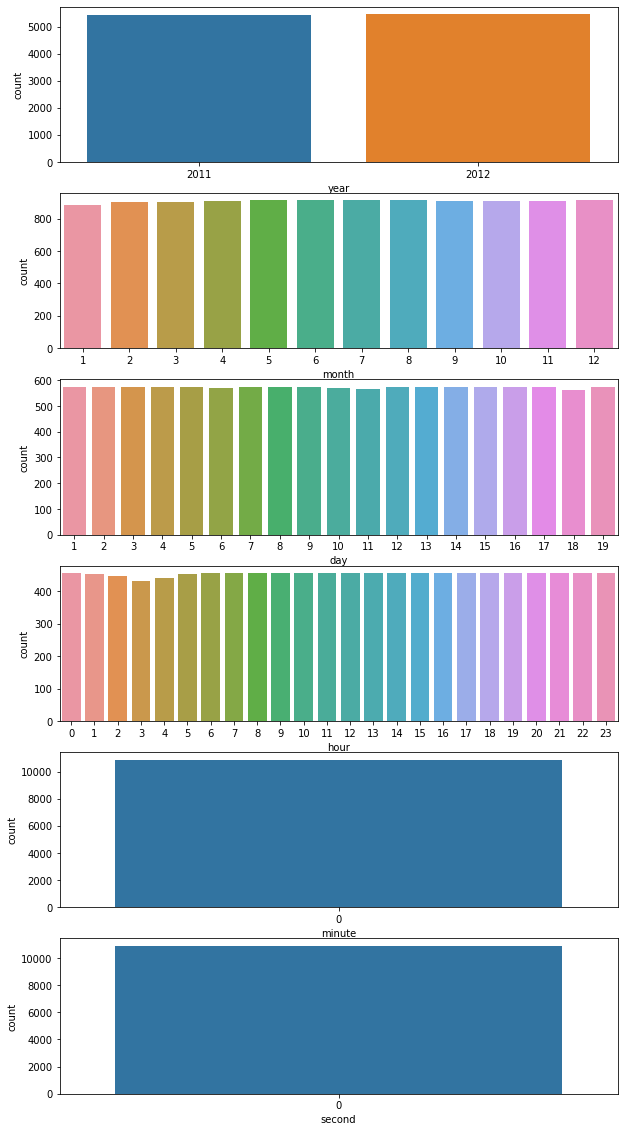

In [132]:
plt.figure(figsize=(10, 20))

plt.subplot(6,1,1)
sns.countplot(x=train['year'])

plt.subplot(6,1,2)
sns.countplot(x=train['month'])

plt.subplot(6,1,3)
sns.countplot(x=train['day'])

plt.subplot(6,1,4)
sns.countplot(x=train['hour'])

plt.subplot(6,1,5)
sns.countplot(x=train['minute'])

plt.subplot(6,1,6)
sns.countplot(x=train['second'])

plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

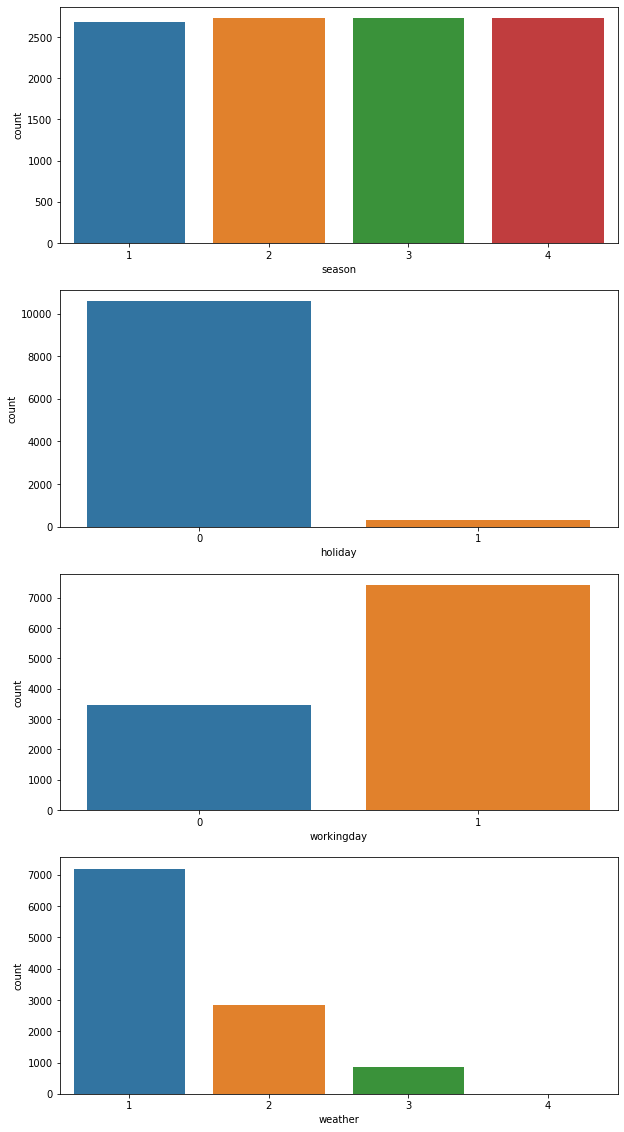

In [133]:
plt.figure(figsize=(10, 20))

plt.subplot(4,1,1)
sns.countplot(x=train['season'])

plt.subplot(4,1,2)
sns.countplot(x=train['holiday'])

plt.subplot(4,1,3)
sns.countplot(x=train['workingday'])

plt.subplot(4,1,4)
sns.countplot(x=train['weather'])

plt.show()

In [145]:
train_dummy = pd.get_dummies(train, columns=['season', 'holiday', 'workingday', 'weather'])

In [146]:
train_dummy.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,month,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,9.84,14.395,81,0.0,3,13,16,2011,1,...,0,0,1,0,1,0,1,0,0,0
1,2011-01-01 01:00:00,9.02,13.635,80,0.0,8,32,40,2011,1,...,0,0,1,0,1,0,1,0,0,0
2,2011-01-01 02:00:00,9.02,13.635,80,0.0,5,27,32,2011,1,...,0,0,1,0,1,0,1,0,0,0
3,2011-01-01 03:00:00,9.84,14.395,75,0.0,3,10,13,2011,1,...,0,0,1,0,1,0,1,0,0,0
4,2011-01-01 04:00:00,9.84,14.395,75,0.0,0,1,1,2011,1,...,0,0,1,0,1,0,1,0,0,0


In [147]:
X_selected= train_dummy.drop(columns=['datetime','atemp', 'casual', 'registered', 'count', 'year'], axis=1)
y = train['count']

In [148]:
## split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=True, random_state=42)

In [149]:
X_train.head()

,temp,humidity,windspeed,month,day,hour,minute,second,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
2815,27.88,83,6.0032,7,6,5,0,0,0,0,1,0,1,0,0,1,1,0,0,0
8695,36.90,39,19.9995,8,4,16,0,0,0,0,1,0,1,0,1,0,1,0,0,0
8406,32.80,41,16.9979,7,11,15,0,0,0,0,1,0,1,0,0,1,1,0,0,0
1543,14.76,93,7.0015,4,10,4,0,0,0,1,0,0,1,0,1,0,0,1,0,0
4952,13.12,45,16.9979,11,19,10,0,0,0,0,0,1,1,0,1,0,1,0,0,0


### (5) LinearRegression 모델 학습


In [150]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [151]:
model.score(X_train, y_train)

0.3472479090619951

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [152]:
def cal_rmse(label, pred):
    mse = ((label-pred)**2).mean()
    rmse = mse**0.5
    return rmse

In [153]:
y_pred = model.predict(X_test)

rmse = cal_rmse(y_test, y_pred)
print(rmse)

146.40982617012438


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

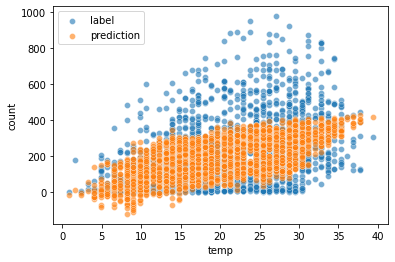

In [154]:
plt.figure()
sns.scatterplot(x=X_test['temp'], y=y_test, alpha=0.6, label='label')
sns.scatterplot(x=X_test['temp'], y=y_pred, alpha=0.6,label='prediction')
plt.legend()
plt.show()


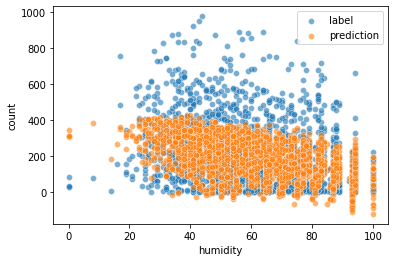

In [155]:
plt.figure()
sns.scatterplot(x=X_test['humidity'], y=y_test, alpha=0.6,label='label')
sns.scatterplot(x=X_test['humidity'], y=y_pred, alpha=0.6,label='prediction')
plt.legend()
plt.show()
